[...]

## Imports

In [3]:
#| echo: false

import sys
from pathlib import Path

src_path = Path('..')
sys.path.append(str(src_path.resolve()))

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from great_tables import GT
from itertools import combinations
from pandas.plotting import scatter_matrix
from IPython.display import (
    display as display3,
    Markdown
)

from src.stylesheet import customize_plots
from src.inspection import make_df, display, display2

In [5]:
#| include: false
customize_plots()
# plt.style.use("_matplotlibrc")
%config InlineBackend.figure_format = 'svg'

## The dataset

### Load the data

We begin by exploring the data to get to know the features and patterns on which we will base our analysis.

In [6]:
#| output: false
#| warning: false
#| code-fold: true

if 'data' not in locals():
    data = pd.read_csv(
        "../data/raw/PBJ_Daily_Nurse_Staffing_Q1_2024.zip",
        encoding='ISO-8859-1',
        low_memory=False
    )
else:
    print("data loaded.")

### Inspect the data

In [7]:
GT(data.sample(10))

PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
155655,PEABODY RETIREMENT COMMUNITY,NORTH MANCHESTER,IN,Wabash,169,2024Q1,20240228,163,8.0,8.0,0.0,6.5,6.5,0.0,43.25,43.25,0.0,40.0,40.0,0.0,121.75,103.75,18.0,284.25,244.25,40.0,0.0,0.0,0.0,158.5,134.75,23.75
245529,BIGFORK VALLEY COMMUNITIES,BIGFORK,MN,Itasca,61,2024Q1,20240322,16,0.0,0.0,0.0,8.0,8.0,0.0,24.25,24.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.5,38.5,0.0,7.25,7.25,0.0,28.5,28.5,0.0
435132,AURORA BRULE NURSING HOME INC,WHITE LAKE,SD,Aurora,3,2024Q1,20240224,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.01,99.01,0.0,0.0,0.0,0.0,11.08,11.08,0.0
225404,ASPEN HILL REHABILIATION & HEALTHCARE CENTER,HAVERHILL,MA,Essex,9,2024Q1,20240104,117,8.0,8.0,0.0,35.75,35.75,0.0,37.5,37.5,0.0,8.0,8.0,0.0,114.5,100.0,14.5,213.25,198.5,14.75,7.0,7.0,0.0,0.0,0.0,0.0
105447,BEDROCK REHABILITATION AND NURSING CENTER AT WEST,DELTONA,FL,Volusia,127,2024Q1,20240320,116,8.0,8.0,0.0,0.0,0.0,0.0,12.5,12.5,0.0,0.0,0.0,0.0,116.75,116.75,0.0,236.25,236.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
345273,KINDRED HOSPITAL EAST GREENSBORO,GREENSBORO,NC,Guilford,81,2024Q1,20240317,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.43,61.43,0.0,99.48,99.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0
676128,THE MADISON ON MARSH,CARROLLTON,TX,Dallas,113,2024Q1,20240330,82,8.5,8.5,0.0,0.0,0.0,0.0,16.33,16.33,0.0,3.62,3.62,0.0,59.55,59.55,0.0,137.81,137.81,0.0,0.0,0.0,0.0,22.0,22.0,0.0
106136,DE LUNA HEALTH AND REHABILITATION CENTER,PENSACOLA,FL,Escambia,33,2024Q1,20240309,90,0.0,0.0,0.0,0.0,0.0,0.0,19.4,19.4,0.0,5.5,5.5,0.0,98.69,82.0,16.69,229.39,229.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0
345446,COLLEGE PINES HEALTH AND REHABILITATION,CONNELLY SPG,NC,Burke,23,2024Q1,20240302,90,0.0,0.0,0.0,0.0,0.0,0.0,34.57,34.57,0.0,0.0,0.0,0.0,25.53,25.53,0.0,213.4,213.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
445286,FAIRPARK HEALTH AND REHABILITATION,MARYVILLE,TN,Blount,9,2024Q1,20240104,69,8.0,8.0,0.0,15.75,15.75,0.0,35.41,35.41,0.0,0.0,0.0,0.0,55.45,55.45,0.0,83.4,83.4,0.0,15.97,15.97,0.0,0.0,0.0,0.0


In [8]:
#| include: false
#| code-fold: true
data.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330966 entries, 0 to 1330965
Data columns (total 33 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   PROVNUM           1330966 non-null  object 
 1   PROVNAME          1330966 non-null  object 
 2   CITY              1330966 non-null  object 
 3   STATE             1330966 non-null  object 
 4   COUNTY_NAME       1330966 non-null  object 
 5   COUNTY_FIPS       1330966 non-null  int64  
 6   CY_Qtr            1330966 non-null  object 
 7   WorkDate          1330966 non-null  int64  
 8   MDScensus         1330966 non-null  int64  
 9   Hrs_RNDON         1330966 non-null  float64
 10  Hrs_RNDON_emp     1330966 non-null  float64
 11  Hrs_RNDON_ctr     1330966 non-null  float64
 12  Hrs_RNadmin       1330966 non-null  float64
 13  Hrs_RNadmin_emp   1330966 non-null  float64
 14  Hrs_RNadmin_ctr   1330966 non-null  float64
 15  Hrs_RN            1330966 non-null  float64
 16  

In [9]:
#| include: true

df = data.describe().round(1)
GT(df.reset_index())

index,COUNTY_FIPS,WorkDate,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
count,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0
mean,91.1,20240215.7,83.4,5.2,5.1,0.1,10.3,10.0,0.2,34.4,31.5,3.0,6.6,6.6,0.1,66.3,59.8,6.5,171.2,158.2,13.0,4.2,4.2,0.1,8.5,8.3,0.2
std,99.2,83.0,49.1,4.5,4.5,0.9,14.9,14.6,1.8,34.7,31.4,10.7,10.7,10.6,1.3,48.4,44.8,16.2,113.7,106.3,32.6,13.1,12.7,2.1,17.6,17.2,2.2
min,1.0,20240101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,31.0,20240123.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,12.0,0.0,0.0,0.0,0.0,32.8,28.2,0.0,97.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,69.0,20240215.0,76.0,8.0,8.0,0.0,7.5,7.4,0.0,25.6,24.2,0.0,0.0,0.0,0.0,56.9,50.8,0.0,148.1,136.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,117.0,20240309.0,104.0,8.0,8.0,0.0,16.0,16.0,0.0,44.8,41.5,0.0,9.0,8.8,0.0,88.6,81.2,5.8,217.0,203.1,11.0,0.0,0.0,0.0,11.2,10.8,0.0
max,840.0,20240331.0,743.0,327.8,327.8,42.0,266.2,266.2,92.5,908.6,904.2,430.6,246.8,246.8,154.4,614.6,604.0,454.0,1857.7,1573.1,694.3,452.0,279.0,280.5,395.6,395.6,128.9


### Group the features

We note that there are 91 records per provider (`len(data["WorkDate"].unique())`) and 1,330,966 records in the table overall. The following table, which collapses the raw data across providers, thus has 14,626 $\left( \frac{1330966}{91} \right)$ entries.

In [10]:
#| include: true
#| label: tbl-counts
#| tbl-cap: Record counts across state, country, city, and provider.

df = (
    data.loc[:, [
        "STATE",
        "COUNTY_NAME", "COUNTY_FIPS",
        "CITY",
        "PROVNAME", "PROVNUM",
    ]]
    .value_counts()
    .to_frame()
    .rename(columns={0: 'Counts'})
)
GT(df.reset_index().head(n=20))

STATE,COUNTY_NAME,COUNTY_FIPS,CITY,PROVNAME,PROVNUM,Counts
AK,Anchorage,20,ANCHORAGE,PRESTIGE CARE & REHAB CENTER OF ANCHORAGE,025025,91
OH,Allen,3,LIMA,LIMA CONVALESCENT HOME,366297,91
OH,Allen,3,LIMA,SHAWNEE MANOR,365361,91
OH,Allen,3,LIMA,SPRINGS OF LIMA THE,366464,91
OH,Allen,3,LIMA,SPRINGVIEW MANOR,366221,91
OH,Allen,3,SPENCERVILLE,ROSELAWN MANOR,365744,91
OH,Ashland,5,ASHLAND,BRETHREN CARE VILLAGE HEALTH CARE CENTER,366166,91
OH,Ashland,5,ASHLAND,CRYSTAL CARE CENTER OF ASHLAND,366239,91
OH,Ashland,5,ASHLAND,GOOD SHEPHERD THE,365093,91
OH,Ashland,5,ASHLAND,KINGSTON OF ASHLAND,365646,91


In [11]:
#| include: false

display2(
    "data['STATE'].value_counts()",
    "data['COUNTY_NAME'].value_counts()",
    "data['CITY'].value_counts()",
    "data['PROVNAME'].value_counts()",
    "data['MDScensus'].value_counts()",
    width="340px",
    globs=globals()
)

In [12]:
#| tbl-column: margin
    
GT(data[["CY_Qtr", "WorkDate", "MDScensus"]].head())

CY_Qtr,WorkDate,MDScensus
2024Q1,20240101,50
2024Q1,20240102,49
2024Q1,20240103,49
2024Q1,20240104,50
2024Q1,20240105,51


### Clean the data

## Explore the dataset

### Visualize distributions

### Visualize relationships

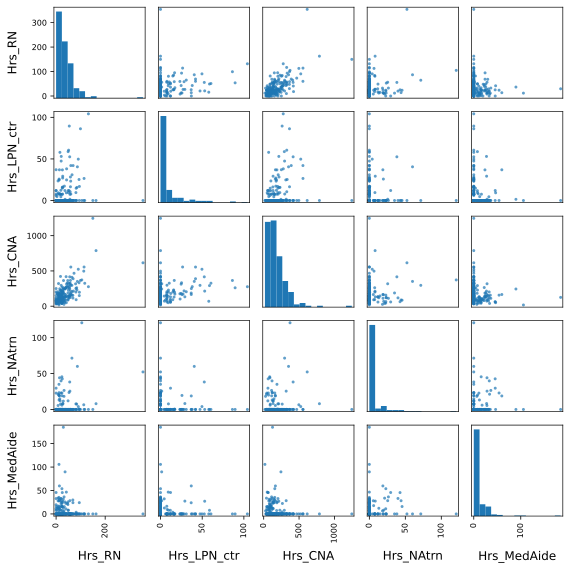

In [13]:
#| include: true
#| label: fig-scatter-matrix
#| fig-cap: Scatter matrix of nursing worker working hours
#| column: body-outset-right

attributes = ["Hrs_RN", "Hrs_LPN_ctr", "Hrs_CNA", "Hrs_NAtrn", "Hrs_MedAide"]
n = len(attributes)

fig, axs = plt.subplots(n, n, figsize=(8, 8))
scatter_matrix(
    data[attributes].sample(200),
    ax=axs, alpha=.7,
    hist_kwds=dict(bins=15, linewidth=0)
)
fig.align_ylabels(axs[:, 0])
fig.align_xlabels(axs[-1, :])
for ax in axs.flatten():
    ax.tick_params(axis='both', which='both', length=3.5)

# save_fig("scatter_matrix_plot")

plt.show()

### Compare groups

::: {#nte-rec1 .callout-note appearance="regular"}

## [Recommendation].


:::

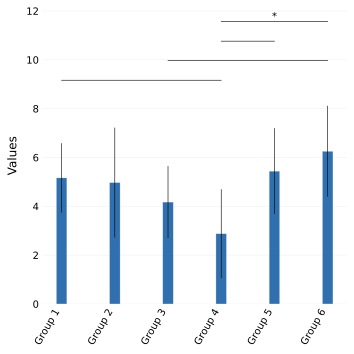

In [14]:
#| include: true
#| label: fig-comparisons
#| fig-cap: Comparison of average nurse working hours.
##| fig-subcap:
##|   - Average working hours with 95% confidence intervals.
##|   - Results of group comparisons by independent t-tests.

N_GROUPS = 6
N_LEVELS = 1

data_ = np.random.normal(loc=5, scale=3.0, size=(N_GROUPS, N_LEVELS, 10))

# Calculate averages and confidence intervals
averages = np.mean(data_, axis=2)
conf_intervals = np.zeros_like(averages, dtype=float)

for group_idx in range(N_GROUPS):
    for level_idx in range(N_LEVELS):
        interval = stats.t.interval(
            0.95,
            len(data_[group_idx, level_idx]) - 1,
            loc=np.mean(data_[group_idx, level_idx]),
            scale=stats.sem(data_[group_idx, level_idx])
        )

        # Use upper bound
        conf_intervals[group_idx, level_idx] = np.abs(
            interval[1] - averages[group_idx, level_idx]
        )

# -- Plot grouped bars with confidence intervals -----------------------------

width = 0.2
colors = plt.cm.Blues_r(np.linspace(.15, .85, N_LEVELS))
line_thickness = 0.6
stagger_amount = 0.8

fig, ax = plt.subplots()

for level_idx in range(N_LEVELS):
    bars = ax.bar(
        np.arange(N_GROUPS) + level_idx * width - (width * (N_LEVELS - 1) / 2),
        averages[:, level_idx],
        yerr=conf_intervals[:, level_idx],
        width=width,
        edgecolor="white",
        alpha=0.85,
        # capsize=3,
        color=colors[level_idx],
        error_kw={'elinewidth': line_thickness, 'capsize': 0},
        label=f'Level {level_idx + 1}',
    )

# Style
ax.set_ylabel('Values')

group_labels = [f'Group {i}' for i in range(1, N_GROUPS + 1)]
ax.set_xticks(np.arange(N_GROUPS))
ax.set_xticklabels(group_labels, rotation=60, ha='right')

# ax.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')

# -- Add staggered sigbars and asterisks for select btwn-group comparisons ---

significance_level = 0.09
stagger_index = 0
stats_list = []

for comb in combinations(range(N_GROUPS), 2):
    group1_center = ax.get_xticks()[comb[0]]
    group2_center = ax.get_xticks()[comb[1]]

    t_stat, p_value = stats.ttest_ind(
        data_[comb[0], :, :].flatten(),
        data_[comb[1], :, :].flatten()
    )

    if p_value < significance_level:
        tallest_bar_height = np.max(averages) + np.max(conf_intervals) + 0.5

        # Adjust the stagger amount
        significance_height = (
            tallest_bar_height
            + np.max(conf_intervals) * 0.07
            + stagger_index * stagger_amount
        )

        # Plot staggered lines aligned with the midpoints of compared groups
        ax.plot(
            [group1_center, group2_center],
            [significance_height] * 2,
            color='black',
            lw=line_thickness
        )

        # Plot asterisks aligned with the center of the significance bars
        asterisks = (
            '*' * sum([p_value < alpha for alpha in [0.01, 0.001, 0.0001]])
        )
        ax.text(
            (group1_center + group2_center) / 2,
            significance_height,
            asterisks,
            ha='center',
            va='bottom',
            fontsize=10
        )

        # Increment the index for staggered bars
        stagger_index += 1

        # Store significant comparisons, t values, and sample sizes
        sample_size1 = len(data_[comb[0], :, :].flatten())
        sample_size2 = len(data_[comb[1], :, :].flatten())
        stats_list.append({
            "Comparison":
                f'{group_labels[comb[0]]} vs {group_labels[comb[1]]}',
            "p-value":
                f"{p_value:.4f}",
            "t-statistic":
                f"{t_stat:.4f}",
            "Sample Size": (
                f'{group_labels[comb[0]]} = {sample_size1}, '
                f'{group_labels[comb[1]]} = {sample_size2}'
            )
        })

# Style and show
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_visible(False)
ax.set_axisbelow(True)

ax.grid(axis='y')
plt.tight_layout()
plt.show()

stats_df = pd.DataFrame(stats_list)

In [15]:
#| echo: false
#| label: tbl-comparisons
#| tbl-cap: Results of group comparisons by independent t-tests.

GT(stats_df)

Comparison,p-value,t-statistic,Sample Size
Group 1 vs Group 4,0.0379,2.2406,"Group 1 = 10, Group 4 = 10"
Group 3 vs Group 6,0.0621,-1.9890,"Group 3 = 10, Group 6 = 10"
Group 4 vs Group 5,0.0344,-2.2892,"Group 4 = 10, Group 5 = 10"
Group 4 vs Group 6,0.0088,-2.9394,"Group 4 = 10, Group 6 = 10"


## Feature engineer

### Join geographical data

### Join seasonal data

## Analyze geography

## Analyze seasonality

## Model

## Extra visualizations

### Sparklines

In [16]:
#| include: false
#| code-summary: Group by state, pivot on date and sum hours

df = data.copy()

hours_columns = [
    'Hrs_RNDON', 'Hrs_RNadmin', 'Hrs_LPNadmin',
    'Hrs_CNA', 'Hrs_NAtrn', 'Hrs_MedAide'
]

# Sum hours across positions
df['Total_Hours'] = df[hours_columns].sum(axis=1)

# Create a list of total hours per state over the work dates
city_hours = (
    df.groupby(['STATE', 'WorkDate'])['Total_Hours']
    .sum()
    .reset_index()
)

# Pivot to create lists of total hours for each state
pivoted_city_hours = city_hours.pivot_table(
    index=['STATE'],
    columns='WorkDate',
    values='Total_Hours',
    aggfunc='sum',
    fill_value=0
)

# Create a new column with lists of total hours over the 91 days
pivoted_city_hours['lines'] = pivoted_city_hours.apply(
    lambda row: {'val': row.tolist()}, axis=1
)

# Prepare the DataFrame for gt
gt_df = pivoted_city_hours.reset_index()[['STATE', 'lines']]

# Create a line plot for total hours trajectory by state
# gt_df['bars'] = gt_df['lines']

gt_df.head()


WorkDate,STATE,lines
0,AK,"{'val': [2207.94, 2712.93, 2761.5499999999997,..."
1,AL,"{'val': [48104.89, 58689.2, 61364.25, 61429.5,..."
2,AR,"{'val': [42257.44, 51400.62, 53068.8, 53019.07..."
3,AZ,"{'val': [25315.55, 29657.54, 30869.61, 31035.9..."
4,CA,"{'val': [240612.74, 272889.84, 278436.09, 2814..."


In [17]:
#| label: fig-sparklines
#| fig-cap: Sparklines of average work hours across 91 days by state.
#| code-fold: true

# Plot sparklines of average work hours across 91 days by state
(
    GT(gt_df.head(), rowname_col="STATE")
    .fmt_nanoplot(
        columns="lines",
        reference_line="mean",
        reference_area=["min", "q1"]
    )
    .tab_header(
        title="Nurse hours worked in the United States",
        subtitle="The top 5 busiest states",
    )
    .tab_stubhead(label="State")
    .cols_label(
        lines="Total hours worked over 91 days",
    )
)

GT(_tbl_data=WorkDate STATE                                              lines
0           AK  {'val': [2207.94, 2712.93, 2761.5499999999997,...
1           AL  {'val': [48104.89, 58689.2, 61364.25, 61429.5,...
2           AR  {'val': [42257.44, 51400.62, 53068.8, 53019.07...
3           AZ  {'val': [25315.55, 29657.54, 30869.61, 31035.9...
4           CA  {'val': [240612.74, 272889.84, 278436.09, 2814..., _body=<great_tables._gt_data.Body object at 0x16a321110>, _boxhead=Boxhead([ColInfo(var='STATE', type=<ColInfoTypeEnum.stub: 2>, column_label='STATE', column_align='left', column_width=None), ColInfo(var='lines', type=<ColInfoTypeEnum.default: 1>, column_label='Total hours worked over 91 days', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x16a320ed0>, _spanners=Spanners([]), _heading=Heading(title='Nurse hours worked in the United States', subtitle='The top 5 busiest states', preheader=None), _stubhead='State', _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x16a127b10>, _formats=[<great_tables._gt_data.FormatInfo object at 0x16a9a9f50>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsI

## Concluding thoughts

(see @nte-rec1)

<!-- ## Archive -->

In [18]:
#| include: false
import pandas as pd
df = pd.DataFrame({'name': ['arizona', '', 'berlin', 'london']})

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geo_clipboard")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
df['location'] = df['name'].apply(geocode)

df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('berlin',), **{}).
Traceback (most recent call last):
  File "/Users/matthewbain/mambaforge/envs/clipboard-CMS/lib/python3.11/site-packages/urllib3/connectionpool.py", line 536, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/Users/matthewbain/mambaforge/envs/clipboard-CMS/lib/python3.11/site-packages/urllib3/connection.py", line 507, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/matthewbain/mambaforge/envs/clipboard-CMS/lib/python3.11/http/client.py", line 1374, in getresponse
    response.begin()
  File "/Users/matthewbain/mambaforge/envs/clipboard-CMS/lib/python3.11/http/client.py", line 318, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/Users/matthewbain/mambaforge/envs/clipboard-CMS/lib/python3.11/http/client.py", line 279, in 

In [19]:
#| include: false
df

,name,location,point
0,arizona,"(Arizona, United States, (34.395342, -111.7632...","(34.395342, -111.763275, 0.0)"
1,,None,None
2,berlin,None,None
3,london,"(London, City of Westminster, England, WC2N 5D...","(51.5074456, -0.1277653, 0.0)"
